# Training the model 

Regression algorithms we will be using: 
- Linear Regression
- Lasso Regression 
- Ridge Regression 
- Nearest Neighbour Regression 
- Support Vector Regression  
- Tree Regression 
- Random Forest Regression 
- Gradient Boosted Regression. 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
df = pd.read_csv('D:/div/ML/Projects/Player-Market-Value-Prediction/Notebook/Dataset/Dataset_After_EDA.csv')

In [32]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0


In [33]:
X = df.drop(columns=['market_value','name'],axis=1)

In [34]:
X.head()

,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Arsenal,28,LW,1,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0
1,Arsenal,28,AM,1,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0
2,Arsenal,35,GK,4,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0
3,Arsenal,28,RW,1,2393,7.5,1.5,122,1.0,England,0,4,1,1,0
4,Arsenal,31,CB,3,912,6.0,0.7,121,2.0,France,0,4,1,1,0


In [35]:
y= df['market_value']
y

0      65.0
1      50.0
2       7.0
3      20.0
4      22.0
       ... 
456     5.0
457     7.0
458     4.5
459     1.0
460    10.0
Name: market_value, Length: 461, dtype: float64

### Now we will encode our features

We will use

OneHot Encoding for 
- position

Target Encoding for
- club
- Nationality

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

### Applying target encoding to 'nationality' and 'club' columns

In [37]:
# Apply target encoding to 'nationality' and 'club' columns
target_encoder = TargetEncoder()
X['nationality_encoded'] = target_encoder.fit_transform(X['nationality'], y)
X['club_encoded'] = target_encoder.fit_transform(X['club'], y)

In [38]:
X['club_encoded']

0      16.967083
1      16.967083
2      16.967083
3      16.967083
4      16.967083
         ...    
456     9.805782
457     9.805782
458     9.805782
459     9.805782
460     9.805782
Name: club_encoded, Length: 461, dtype: float64

In [39]:
X['nationality_encoded']

0      14.627533
1      12.123358
2      10.052837
3       8.328529
4      15.349311
         ...    
456    11.576955
457    10.863033
458     8.328529
459     8.328529
460    11.682551
Name: nationality_encoded, Length: 461, dtype: float64

In [40]:
X.head()

,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,nationality_encoded,club_encoded
0,Arsenal,28,LW,1,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0,14.627533,16.967083
1,Arsenal,28,AM,1,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0,12.123358,16.967083
2,Arsenal,35,GK,4,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0,10.052837,16.967083
3,Arsenal,28,RW,1,2393,7.5,1.5,122,1.0,England,0,4,1,1,0,8.328529,16.967083
4,Arsenal,31,CB,3,912,6.0,0.7,121,2.0,France,0,4,1,1,0,15.349311,16.967083


In [41]:
# Drop the original categorical columns after encoding
X.drop(columns=['nationality', 'club'], inplace=True)

In [42]:
X.head()

,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,nationality_encoded,club_encoded
0,28,LW,1,4329,12.0,17.1,264,3.0,0,4,1,1,0,14.627533,16.967083
1,28,AM,1,4395,9.5,5.6,167,2.0,0,4,1,1,0,12.123358,16.967083
2,35,GK,4,1529,5.5,5.9,134,2.0,0,6,1,1,0,10.052837,16.967083
3,28,RW,1,2393,7.5,1.5,122,1.0,0,4,1,1,0,8.328529,16.967083
4,31,CB,3,912,6.0,0.7,121,2.0,0,4,1,1,0,15.349311,16.967083


In [43]:
y.head()

0    65.0
1    50.0
2     7.0
3    20.0
4    22.0
Name: market_value, dtype: float64

### Creating numerical cols for data preprocessing 
- Standard Scaling

In [44]:
# Create a list of numerical columns
numerical_cols = ['age', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing']

#### One Hot Encoding

In [45]:
# Define the transformers for numerical and one-hot encoding
num_transformer = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [46]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('one_hot', one_hot_encoder, ['position']),
        ('passthrough', 'passthrough', ['nationality_encoded', 'club_encoded'])
    ],
    remainder='drop'
)

In [47]:
X= preprocessor.fit_transform(X)

### Splitting the data for training

In [48]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((368, 27), (93, 27))

In [49]:
print(X_train[0:5])

[[-2.03348948e-01  8.20797073e-01 -6.30403947e-01 -7.04665040e-01
  -5.36952614e-01 -4.20583176e-01  9.06924560e-03 -1.89618185e-01
  -1.61195795e-01  1.34013894e+00 -6.60406747e-01  2.42499423e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.76715772e+01  7.51248673e+00]
 [ 5.54687698e-01 -1.18125293e+00  1.62895602e+00  1.15374791e+00
   4.51095292e-02  8.42229359e-01  9.06924560e-03 -1.89618185e-01
   6.21028009e-01  2.91235627e-01  1.51421833e+00 -4.12372115e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.50080486e+01  1.69577463e+01]
 [ 2.32343987e+00 -1.18125293e+00 -5.89578612e-01 -7.04665040e-01
  -5.01676121e-01 -1.08026137e+00  1.054

#### For Evaluation of Model

We will consider-:
- MAE
- MSE
- RMSE
- R-Square

In [50]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Training...

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4108
- Mean Absolute Error: 3.9024
- R2 Score: 0.8126
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.8056
- Mean Absolute Error: 3.6901
- R2 Score: 0.8092


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.1803
- Mean Absolute Error: 4.2506
- R2 Score: 0.7555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.5036
- Mean Absolute Error: 3.3863
- R2 Score: 0.8325


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4172
- Mean Absolute Error: 3.8905
- R2 Score: 0.8121
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7547
- Mean Absolute Error: 3.6543
- R2 Score: 0.8132


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.5744
- Mean Absolute Error: 3.6248
- R2 Score: 0.8011
-----------------------

In [52]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Random Forest Regressor,0.869728
7,Gradient Boost Regressor,0.844549
1,Lasso,0.832451
3,K-Neighbors Regressor,0.830607
2,Ridge,0.813244
0,Linear Regression,0.809225
5,Decision Tree,0.708286
4,Support Vector Regressor,0.551106


So as we can see 

**Random Forest Regressor** performs better than other regressors

### Visualizing Linear Regression 

In [53]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 80.92


Text(0, 0.5, 'Predicted')

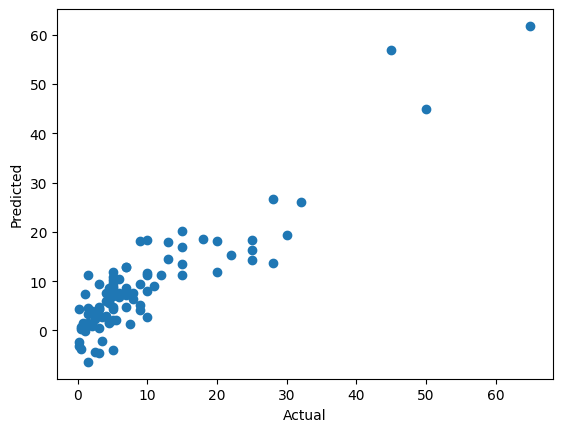

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='market_value'>

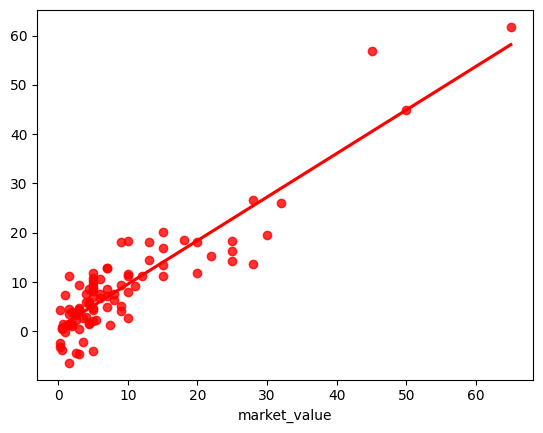

In [55]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Implementation of Genetic Algorithm

In [56]:
X_train.shape

(368, 27)

In [57]:
class GeneticAlgorithmRegression:
    """
    Genetic Algorithm for attribute weight optimization in Nearest Neighbors Regression.

    Parameters:
        num_attributes (int): Number of attributes in the dataset.
        population_size (int): Size of the population in the genetic algorithm.
        mutation_rate (float): Probability of mutation for each attribute.
        crossover_rate (float): Probability of crossover between parents.
        num_generations (int): Number of generations for the genetic algorithm.
    """
    def __init__(self, num_attributes, population_size, mutation_rate, crossover_rate, num_generations):
        self.num_attributes = num_attributes
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations

    def initialize_population(self):
        """
        Initialize the population of attribute weights.

        Returns:
            list: A list of arrays representing the population of attribute weights.
        """
        population = []
        for _ in range(self.population_size):
            weights = np.random.rand(self.num_attributes)
            weights /= np.sum(weights)  # Normalize weights
            population.append(weights)
        return population

    def tournament_selection(self, population, fitness_scores, tournament_size=3):
        """
        Select parents from the population for crossover using tournament selection.

        Parameters:
            population (list): A list of arrays representing the population of attribute weights.
            fitness_scores (list): A list of fitness scores corresponding to the individuals in the population.
            tournament_size (int): Size of the tournament.

        Returns:
            list: A list of arrays representing the selected parents for crossover.
        """
        selected_parents = []
        for _ in range(2):
            tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
            tournament_fitness = [fitness_scores[i] for i in tournament_indices]
            selected_index = tournament_indices[np.argmax(tournament_fitness)]
            selected_parents.append(population[selected_index])
        return selected_parents

    def crossover(self, parent1, parent2):
        """
        Apply crossover between two parents to produce offspring.

        Parameters:
            parent1 (array): Array representing attribute weights of parent 1.
            parent2 (array): Array representing attribute weights of parent 2.

        Returns:
            tuple: Two arrays representing the offspring produced after crossover.
        """
        if np.random.rand() < self.crossover_rate:
            crossover_point = np.random.randint(1, self.num_attributes)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            return child1, child2
        else:
            return parent1, parent2

    def mutate(self, individual):
        """
        Apply mutation to an individual's attribute weights.

        Parameters:
            individual (array): Array representing attribute weights of an individual.

        Returns:
            array: Array representing attribute weights after mutation.
        """
        if np.random.rand() < self.mutation_rate:
            mutation_point = np.random.randint(0, self.num_attributes)
            individual[mutation_point] = np.random.rand()
        return individual

    def calculate_fitness(self, weights, X_train, y_train, X_test, y_test):
        """
        Calculate the fitness of an individual using R-squared.

        Parameters:
            weights (array): Array representing attribute weights of an individual.
            X_train (array): Training dataset features.
            y_train (array): Training dataset labels.
            X_test (array): Test dataset features.
            y_test (array): Test dataset labels.

        Returns:
            float: R-squared value representing the fitness of the individual.
        """
        knn = KNeighborsRegressor(weights='distance')  
        knn.fit(X_train, y_train)
        predicted_labels = knn.predict(X_test)
        r_squared = r2_score(y_test, predicted_labels)
        return r_squared

    def evolve(self, X_train, y_train, X_test, y_test):
        """
        Evolve the population through generations using genetic algorithm.

        Parameters:
            X_train (array): Training dataset features.
            y_train (array): Training dataset labels.
            X_test (array): Test dataset features.
            y_test (array): Test dataset labels.

        Returns:
            array: Array representing the best attribute weights obtained after evolution.
        """
        population = self.initialize_population()
        for generation in range(self.num_generations):
            # Calculate fitness for each individual in the population
            fitness_scores = [self.calculate_fitness(individual, X_train, y_train, X_test, y_test) for individual in population]

            new_population = []
            for _ in range(self.population_size // 2):
                # Selection
                parent1, parent2 = self.tournament_selection(population, fitness_scores)
                # Crossover
                child1, child2 = self.crossover(parent1, parent2)
                # Mutation
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])

            population = new_population

        # Return the best individual after all generations
        best_individual = max(population, key=lambda x: self.calculate_fitness(x, X_train, y_train, X_test, y_test))
        return best_individual


if __name__ == "__main__":
    # Assuming you have your data split into X_train, y_train, X_test, and y_test
    num_attributes = X_train.shape[1]  # Number of attributes
    population_size = 50  # Size of the population
    mutation_rate = 0.1  # Probability of mutation
    crossover_rate = 0.8  # Probability of crossover
    num_generations = 100  # Number of generations

    # Initialize Genetic Algorithm
    genetic_algorithm = GeneticAlgorithmRegression(num_attributes, population_size, mutation_rate, crossover_rate, num_generations)

    # Evolve and find the best attribute weights
    best_weights = genetic_algorithm.evolve(X_train, y_train, X_test, y_test)
    best_r_squared = genetic_algorithm.calculate_fitness(best_weights, X_train, y_train, X_test, y_test)
    print("R-squared:", best_r_squared)
    print("Weights:",best_weights)

R-squared: 0.8376195323838385
Weights: [0.01122453 0.0341917  0.46443136 0.03699004 0.01008716 0.00238591
 0.32906766 0.04051309 0.06179289 0.39065083 0.0112733  0.06610867
 0.01482719 0.13122918 0.05158577 0.00808297 0.07815354 0.04920801
 0.15270763 0.06205487 0.04240215 0.06354948 0.06513626 0.07138041
 0.04279507 0.25932985 0.01849203]
